In [25]:
import matplotlib.pyplot as plt
import my_library as my
import numpy as np
import scipy as sp
import pandas as pd
from scipy import stats
from math import log10, floor,pi,sqrt
def my_line(x, m=1, c=0):
    return x*m 
def y_inc(xl, sigma_m, sigma_c, cov_mc):
    return np.sqrt(np.power(xl, 2)*np.power(sigma_m, 2) +
                   np.power(sigma_c, 2) +
                  2*xl*cov_mc) 
m=0.001
u=0.000001
n=0.000000001
p=0.000000000001
k=1000
M=1000000
G=1000000000
T=1000000000000

In [79]:
#3% + 10 millvolt
R = 2.673*k
C = 22*n

V01 = 1000
sV01 = 1
V02 = 2000
sV02 = 1
V03 = 500
sV03 = 1

ep = 0.001

def sigmaV(v):
    return v/100*3+10

def sig(v,sv,v0,sv0):
    return v/v0*np.sqrt( np.power(sv/v,2) + np.power(sv0/v0,2) ) 
def slog(s,v):
    return np.abs( np.log(v+s) - np.log(v) ) 
def sigtot(v,sv,v0,sv0):
    return slog( sig(v,sv,v0,sv0), v/v0 )

In [80]:
Tau = R*C
mTau = -1/Tau
print("Tau = ",Tau)
print("mTau = ",mTau)

Tau =  5.8806000000000006e-05
mTau =  -17005.067510118013


In [86]:
Data = pd.read_csv('Data.csv').T.to_numpy()

T1 = Data[0]
T2 = Data[2]
T3 = Data[4]

Y1 = np.log(1-Data[1]/V01)
Y2 = np.log(Data[3]/V02)
Y3 = np.log(1-Data[5]/V03)

sigma = np.array([ep,ep,ep,ep,ep,ep,ep,ep,ep,ep,ep,ep])
In = sigtot(0.500-Data[5]*m,ep,0.5,0.001)
In

array([0.00282443, 0.00355045, 0.00503049, 0.0073902 , 0.01099141,
       0.01664691, 0.02477053, 0.03514534, 0.04882824, 0.08006486,
       0.11779726, 0.22314995])

In [87]:
m1,sm1,c1,sc1,cs1 = my.lin_fit ( T1, Y1, sigma, verbose=False,plot=False)
m2,sm2,c2,sc2,cs2 = my.lin_fit ( T2, Y2, sigma, verbose=False,plot=False)
m3,sm3,c3,sc3,cs3 = my.lin_fit ( T3, Y3, In, verbose=False,plot=False)
print("m1 = ",m1,"+-",sm1)
print("m2 = ",m2,"+-",sm2)
print("m3 = ",m3,"+-",sm3)

m1 =  -0.019193860230141302 +- 3.916943111055179e-06
m2 =  -0.018881485504435348 +- 3.916943111055179e-06
m3 =  -0.03507312926286666 +- 0.00012048495182508447


In [88]:
Tau1 = -0.1/m1
Tau2 = -0.1/m2
Tau3 = -0.1/m3
print("Tau1 = ",Tau1)
print("Tau2 = ",Tau2)
print("Tau3 = ",Tau3)

Tau1 =  5.2099993852702875
Tau2 =  5.296193457686872
Tau3 =  2.8511855686020593


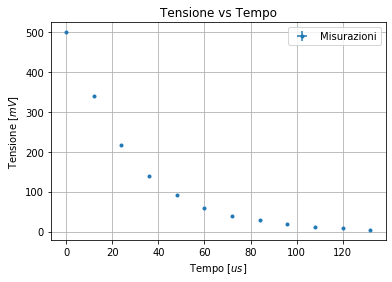

In [89]:
# rappresento i punti misurati
plt.errorbar(T3, 500-Data[5], yerr=0, xerr=0, ls='', marker='.', label='Misurazioni')

plt.grid(b=None, which='major', axis='both')

plt.xlabel('Tempo [$us$]')
plt.ylabel('Tensione [$mV$]')
plt.title('Tensione vs Tempo')
plt.legend()

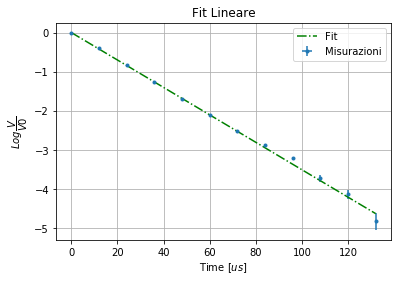

In [90]:
xmin = 0
xmax = 132

# rappresento i punti misurati
plt.errorbar(T3, Y3, yerr=In, xerr=0, ls='', marker='.', label='Misurazioni')

# costruisco dei punti x su cui valutare la retta di regressione
xl = np.linspace(xmin, xmax, 100)

# uso i parametri medi di m e c
yl0 = my_line(xl, m3,c3)

# rappresento la retta di regressione
plt.plot(xl, yl0, 'g-.', label='Fit')
plt.grid(b=None, which='major', axis='both')

plt.xlabel('Time [$us$]')
plt.ylabel('$Log\dfrac{V}{V0}$')
plt.title('Fit Lineare')
plt.legend()